126


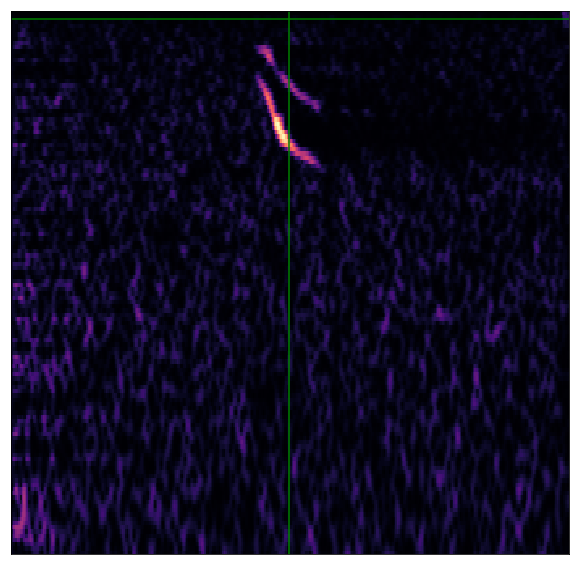

In [127]:
import h5py
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import sys


sys.path.append('../src')
import localmodule

data_dir = localmodule.get_data_dir()
dataset_name = localmodule.get_dataset_name()
pcen_name = "_".join([dataset_name, 'clip-pcen'])
pcen_dir = os.path.join(data_dir, pcen_name)
original_dir = os.path.join(pcen_dir, 'original')
units = localmodule.get_units()

unit_str = units[0]
unit_name = "_".join([dataset_name, 'original', unit_str]) + ".hdf5"
unit_path = os.path.join(original_dir, unit_name)
unit_file = h5py.File(unit_path, 'r')

keys = list(unit_file['pcen'].keys())
positive_keys = [k for k in keys if k.split('_')[3]=='1']

positive_key = positive_keys[180]
freq_hz = int(positive_key.split('_')[2])
pcen = unit_file['pcen'][positive_key].value

pcen_settings = localmodule.get_pcen_settings()
mel_scale = librosa.mel_frequencies(
    n_mels=pcen_settings["n_mels"],
    fmin=pcen_settings["fmin"],
    fmax=pcen_settings["fmax"])
center_mel = np.argmin(np.abs(mel_scale - freq_hz))
print(center_mel)

%matplotlib inline
plt.figure(figsize=(10, 10))
plt.plot([172, 172], [0, 128], color='g')
plt.plot([0, 345], [center_mel, center_mel], color='g')
librosa.display.specshow(pcen)

In [112]:
center_mel

126

65